# Removing stop words using regex 

In [46]:
pip install praw

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [47]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="lvnzs8-qJr-J5-4GcRq1Yg",
    client_secret="L5xMpuZ4WHh4CIh3Vs2grKs1hMgL1g",
    user_agent=user_agent
)

In [48]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

In [49]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'over', 'such', 'should', 're', "haven't", 'an', 'me', 'below', 'just', 'here', 'because', "should've", "shan't", 'all', 'after', 'more', 'these', 'some', 'himself', 'but', "couldn't", 'to', 'them', 'under', 'against', 'before', 'you', 'for', 'had', 'does', 'shouldn', 'mightn', "you'll", "you're", 'having', 'who', "wasn't", 'their', 'i', 'is', "it's", "don't", "aren't", 'itself', 'hers', 'there', 'further', 'aren', 'own', 'most', 'doing', 'he', "wouldn't", 'hadn', 'isn', 'mustn', 'no', 'very', 'any', 'wasn', 'couldn', 'only', 'be', 'then', 'my', 'not', 'a', 'off', 'this', 'being', 'the', 'out', 'when', 'll', 'doesn', 'they', "shouldn't", 'what', 'yours', 'yourselves', 'up', 'in', 'both', 'don', 'than', 'other', 'once', 'that', 'at', 'won', 'didn', 'our', 'am', 'or', 'too', "didn't", 'if', 'have', 'did', 'each', 'we', 'ours', 's', "won't", 'were', 'her', 'ma', 'yourself', 'it', 'why', "mightn't", 'shan', 'by', 'theirs', 'been', 'while', 'of', "she's", "hasn't", "needn't", 'ain', 'until

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
headlines = set()
for submission in reddit.subreddit("viratkohli").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Cricket 🏏 ( Respect )
1aqgjee
tauselhamtamjid
1707892815.0
45
0.96
https://v.redd.it/r72baol6yhic1
0


In [51]:
headlines = set()
for submission in reddit.subreddit("viratkohli").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

378


In [52]:
#Create a dataframe from the scrapped data 
viratkohli_df = pd.DataFrame(headlines)
viratkohli_df.head()

,0
0,Proof Virat Kohli Is NOT Human
1,"MS Dhoni Biography : Family, Age, Early life a..."
2,King Kohli- The Brand
3,India in Australia: Virat Kohli in Focus at Pr...
4,Major Achievements of Virat Kohli


In [54]:
viratkohli_df.columns

RangeIndex(start=0, stop=1, step=1)

In [55]:
viratkohli_df.columns = ['Titles']

In [56]:
viratkohli_df.head()

,Titles
0,Proof Virat Kohli Is NOT Human
1,"MS Dhoni Biography : Family, Age, Early life a..."
2,King Kohli- The Brand
3,India in Australia: Virat Kohli in Focus at Pr...
4,Major Achievements of Virat Kohli


In [57]:
viratkohli_df.Titles.duplicated().sum() 

0

In [58]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
viratkohli_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
viratkohli_df.head()

,Titles
0,Proof Virat Kohli Is NOT Human
1,"MS Dhoni Biography Family, Age, Early life an..."
2,King Kohli- The Brand
3,India in Australia Virat Kohli in Focus at Pri...
4,Major Achievements of Virat Kohli


# Create pipeline, remove stop words, word frequency analysis and wordclouds

In [59]:
import regex as r

In [60]:
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [61]:
testtext = "Let's defeat SARS-CoV-2 together in 2020! www.cdc.gov" # Define the test text
testtokens = tokenize(testtext)
print(testtokens)

['Let', 's', 'defeat', 'SARS-CoV-2', 'together', 'in', 'www', 'cdc', 'gov']


In [62]:
import nltk
nltk.download('stopwords') # Download stopwords from NLTK
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)
# Print stopwords

{'over', 'such', 'should', 're', "haven't", 'an', 'me', 'below', 'just', 'here', 'because', "should've", "shan't", 'all', 'after', 'more', 'these', 'some', 'himself', 'but', "couldn't", 'to', 'them', 'under', 'against', 'before', 'you', 'for', 'had', 'does', 'shouldn', 'mightn', "you'll", "you're", 'having', 'who', "wasn't", 'their', 'i', 'is', "it's", "don't", "aren't", 'itself', 'hers', 'there', 'further', 'aren', 'own', 'most', 'doing', 'he', "wouldn't", 'hadn', 'isn', 'mustn', 'no', 'very', 'any', 'wasn', 'couldn', 'only', 'be', 'then', 'my', 'not', 'a', 'off', 'this', 'being', 'the', 'out', 'when', 'll', 'doesn', 'they', "shouldn't", 'what', 'yours', 'yourselves', 'up', 'in', 'both', 'don', 'than', 'other', 'once', 'that', 'at', 'won', 'didn', 'our', 'am', 'or', 'too', "didn't", 'if', 'have', 'did', 'each', 'we', 'ours', 's', "won't", 'were', 'her', 'ma', 'yourself', 'it', 'why', "mightn't", 'shan', 'by', 'theirs', 'been', 'while', 'of', "she's", "hasn't", "needn't", 'ain', 'until

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [64]:
cleantokens= remove_stop(testtokens)
print(cleantokens)

['Let', 'defeat', 'SARS-CoV-2', 'together', 'www', 'cdc', 'gov']


In [65]:
pipeline = [str.lower, tokenize, remove_stop]

In [66]:
def prepare(text, pipeline):
    tokens = text # Initialize tokens with the input text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens  # Return the processed tokens

In [79]:
viratkohli_df['tokens'] = viratkohli_df['Titles'].apply(prepare, pipeline = pipeline)# Apply the prepare function to the 'text' column of the DataFrame

In [80]:
viratkohli_df['num_tokens'] = viratkohli_df['tokens'].map(len)
viratkohli_df.tail()

,Titles,tokens,num_tokens
373,Kohli BOWLS India to victory with 2 wickets in...,"[kohli, bowls, india, victory, wickets, balls,...",9
374,Are You Virat Kohli Fan Must Watch,"[virat, kohli, fan, must, watch]",5
375,Kohli- Siraj duo!,"[kohli-, siraj, duo]",3
376,Virat Kohli steps down as India Test captain,"[virat, kohli, steps, india, test, captain]",6
377,Are You More Like Mahendra Singh Dhoni Or Vira...,"[like, mahendra, singh, dhoni, virat, kohli]",6


In [36]:
from collections import Counter
tokens = tokenize("She likes my cats and my cats like my sofa.")#tokenize the text
testcount= Counter(tokens)
print(testcount)#print the testcount

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


In [37]:
more_tokens = tokenize("She likes dogs and cats.")
testcount.update(more_tokens)
print(testcount) # Print the updated counter

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


In [81]:
counter = Counter()
viratkohli_df['tokens'].map(counter.update)
print(counter.most_common(5)) #print the most common 5 tokens

[('virat', 185), ('kohli', 181), ('india', 24), ('cricket', 22), ('|', 22)]


In [82]:
freq_df = pd.DataFrame.from_dict(counter,orient='index', columns=['freq']) # Convert dictionary to DataFrame
freq_df = freq_df.query('freq >= 1') # Filter DataFrame to include only frequencies >= 1
freq_df.index.name = 'token' # Set the name of the index to 'token'

In [83]:
freq_df = freq_df.sort_values('freq', ascending=False) # Sort the DataFrame by frequency in descending order

freq_df.head(10)# Display the top 10 rows of the sorted DataFrame

,freq
token,
virat,185
kohli,181
india,24
|,22
cricket,22
sharma,19
world,18
anushka,18
king,17


In [84]:
freq_df.describe()

,freq
count,1006.000000
mean,2.135189
std,8.367053
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,185.000000


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

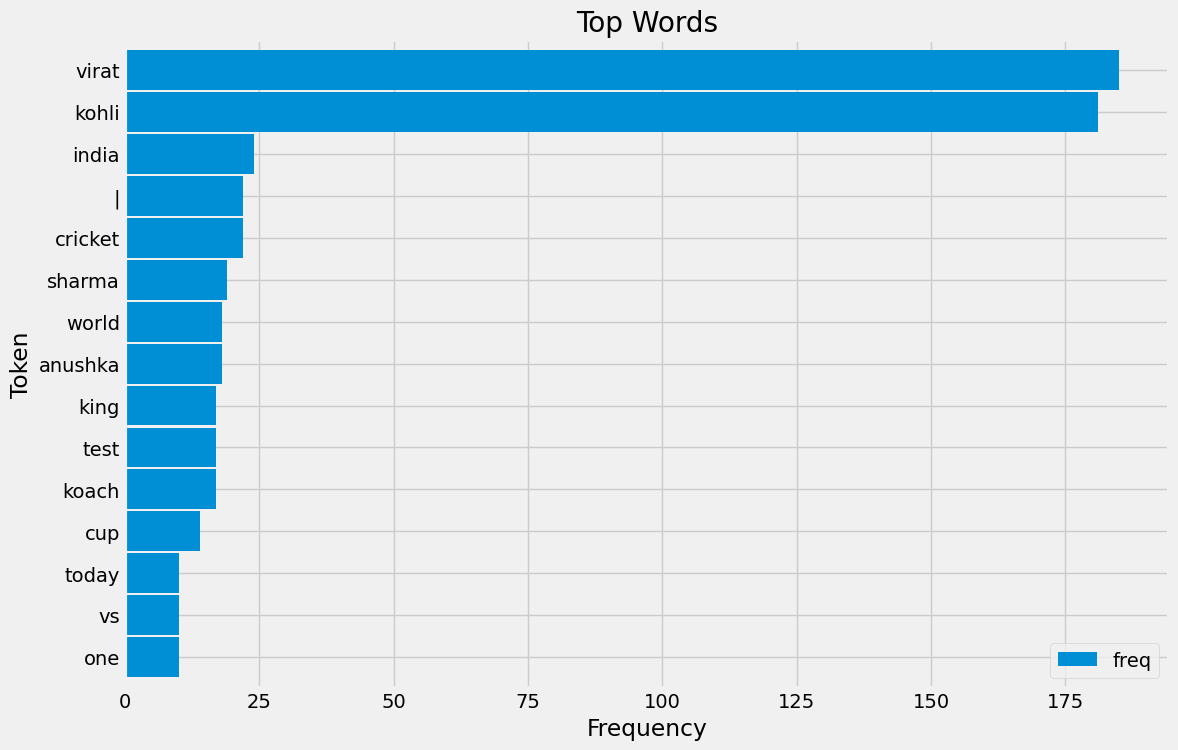

In [85]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))# Plot the top 15 tokens with their frequencies
ax.invert_yaxis()# Invert the y-axis to display the most frequent tokens at the top
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words') 
# Set labels and title for the plot

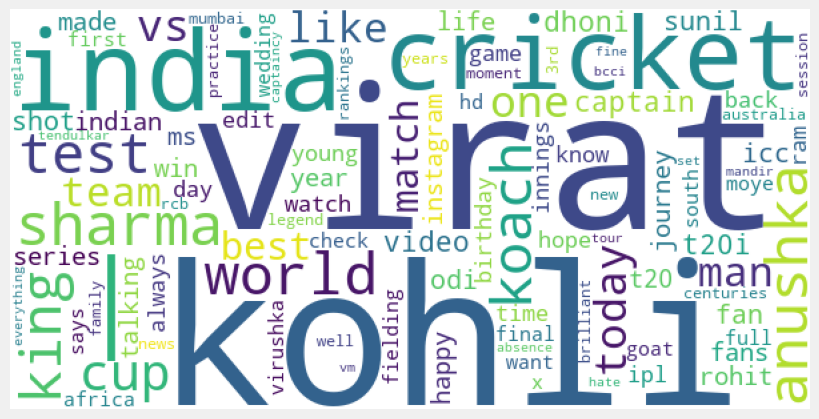

In [88]:
wc = WordCloud(background_color='white', width = 600, height=300,max_words=100, margin=2)# Initialize WordCloud with parameters
wc.fit_words(freq_df['freq'].to_dict() )# Fit WordCloud with frequency dictionary
plt.figure(figsize = (8, 8), facecolor = None)# Set figure size and face color
plt.imshow(wc)
plt.axis("off")# Turn off axis
plt.tight_layout(pad = 0)
plt.show()# Show the WordCloud

In [89]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [91]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
viratkohli_df['Subjectivity'] = viratkohli_df['Titles'].apply(getSubjectivity)
viratkohli_df['Polarity'] = viratkohli_df['Titles'].apply(getPolarity)

#Now display data
viratkohli_df.head()

,Titles,tokens,num_tokens,Subjectivity,Polarity
0,Proof Virat Kohli Is NOT Human,"[proof, virat, kohli, human]",4,0.1,0.0000
1,"MS Dhoni Biography Family, Age, Early life an...","[ms, dhoni, biography, family, age, early, lif...",8,0.3,0.1000
2,King Kohli- The Brand,"[king, kohli-, brand]",3,0.0,0.0000
3,India in Australia Virat Kohli in Focus at Pri...,"[india, australia, virat, kohli, focus, prime,...",9,0.0,0.0000
4,Major Achievements of Virat Kohli,"[major, achievements, virat, kohli]",4,0.5,0.0625


In [92]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
viratkohli_df["Insight"] = viratkohli_df["Polarity"].apply(getInsight)

viratkohli_df.head(50)

,Titles,tokens,num_tokens,Subjectivity,Polarity,Insight
0,Proof Virat Kohli Is NOT Human,"[proof, virat, kohli, human]",4,0.100000,0.000000,Neutral
1,"MS Dhoni Biography Family, Age, Early life an...","[ms, dhoni, biography, family, age, early, lif...",8,0.300000,0.100000,Positive
2,King Kohli- The Brand,"[king, kohli-, brand]",3,0.000000,0.000000,Neutral
3,India in Australia Virat Kohli in Focus at Pri...,"[india, australia, virat, kohli, focus, prime,...",9,0.000000,0.000000,Neutral
4,Major Achievements of Virat Kohli,"[major, achievements, virat, kohli]",4,0.500000,0.062500,Positive
5,Virat Kohli surpasses Don Bradman and Sunil Ga...,"[virat, kohli, surpasses, bradman, sunil, gava...",6,0.000000,0.000000,Neutral
6,Intent??,[intent],1,0.000000,0.000000,Neutral
7,ABDesque shot!,"[abdesque, shot]",2,0.000000,0.000000,Neutral
8,Kohli moves to no. 6 in ICC test rankings!,"[kohli, moves, icc, test, rankings]",5,0.000000,0.000000,Neutral
9,Virat Kohli hugs Dean Elgar after his wicket a...,"[virat, kohli, hugs, dean, elgar, wicket, give...",8,0.000000,0.000000,Neutral


In [93]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

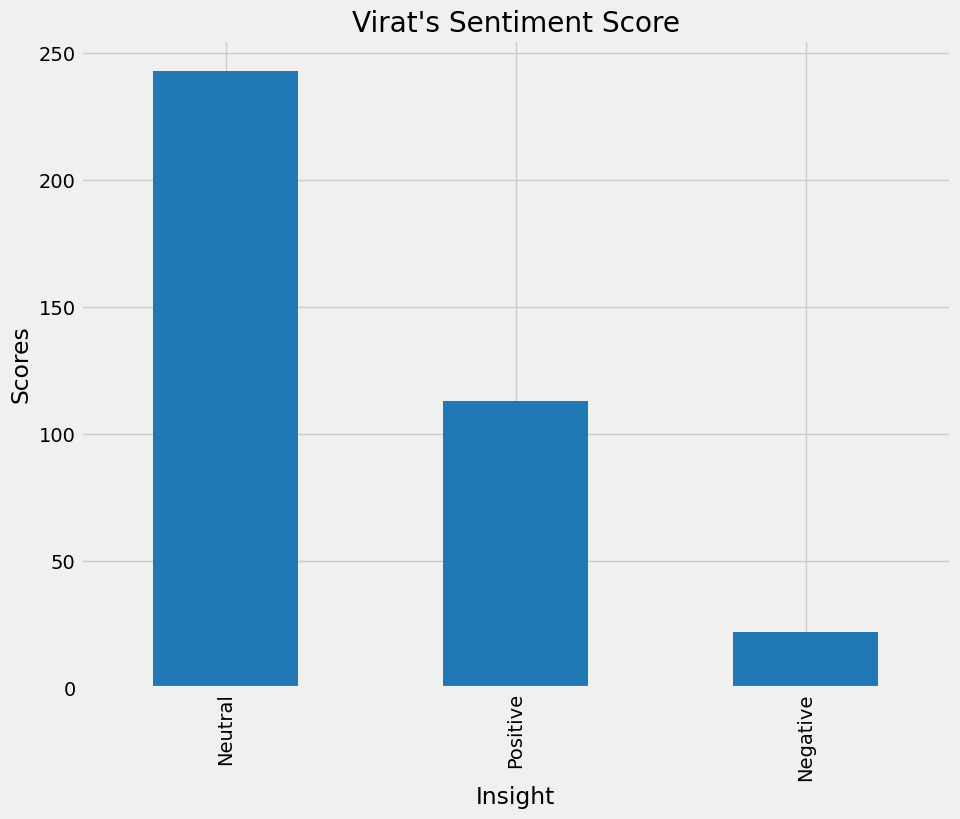

In [95]:
#Plot the values count of sentiment
plt.title("Virat's Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
viratkohli_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

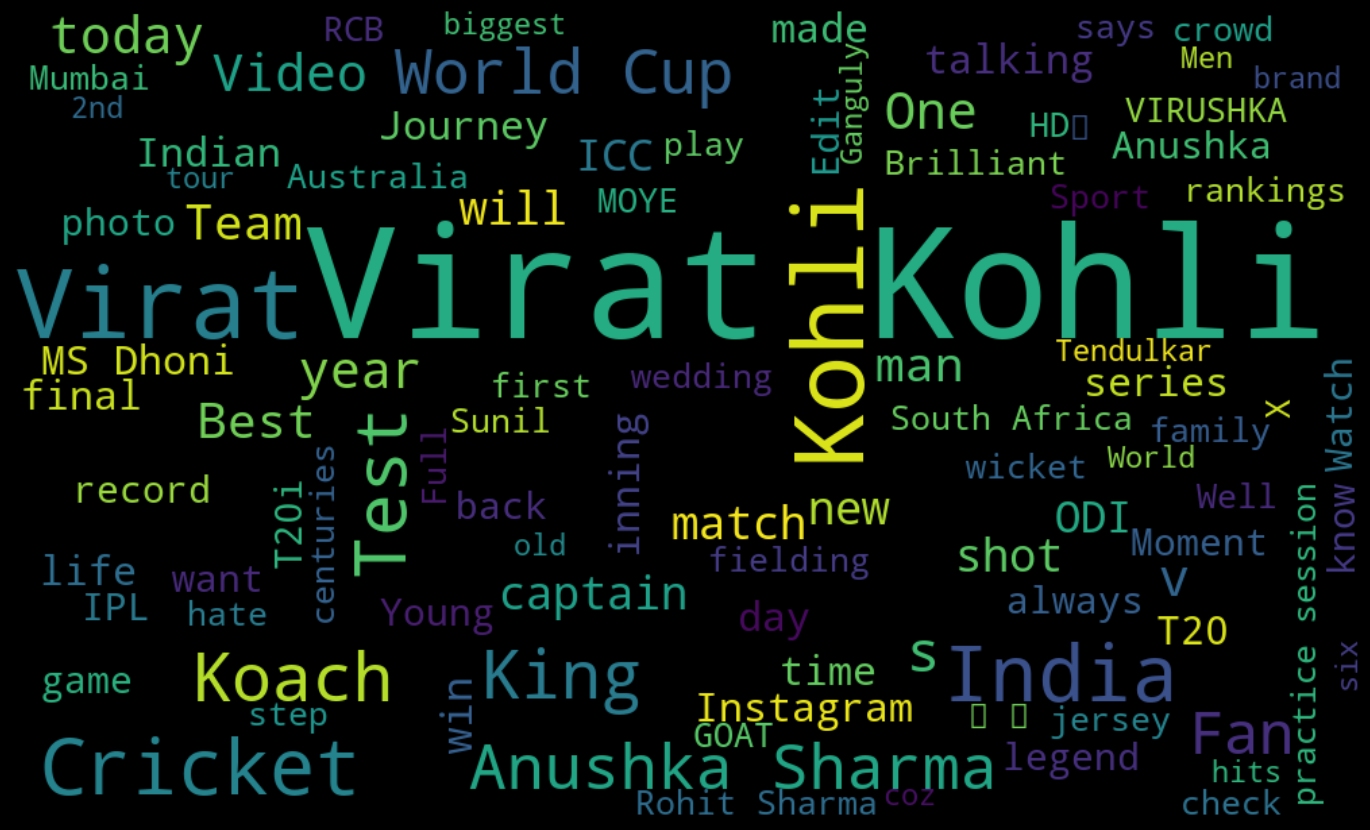

In [96]:
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

# Bing liu score

In [98]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.4 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 809.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 3.3 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/10.6 MB 7.2 MB/s eta 0:00:02
   ------ --------------------------------- 1.6/10.6 MB 12.9 MB/s eta 0:00:01
   --------- ------------------------------ 2.6/10.6 MB 15.2 MB/s eta 0:00:01
   ------------- -------------------------- 3.6/10.6 MB 16.5 MB/s eta 0:00:01
   ----------------- ---------------------- 4.6/10.6 MB 17.5 MB/s eta 0:00:01
   --------------------- ------------------ 5.7/10.6 MB 18.3 MB/s eta 0:00:01
   

In [99]:
from sklearn import preprocessing
import nltk
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

print('Total number of words in opinion lexicon', len(opinion_lexicon.words()))
print('Examples of positive words in opinion lexicon',
      opinion_lexicon.positive()[:10])
print('Examples of negative words in opinion lexicon',
      opinion_lexicon.negative()[:10])

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\tejap\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\opinion_lexicon.zip.


Total number of words in opinion lexicon 6789
Examples of positive words in opinion lexicon ['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
Examples of negative words in opinion lexicon ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


In [101]:
# Let's create a dictionary which we can use for scoring our review text
nltk.download('punkt')
viratkohli_df.rename(columns={"reviewText": "text"}, inplace=True)
pos_score = 1
neg_score = -1
word_dict = {}
 
# Adding the positive words to the dictionary
for word in opinion_lexicon.positive():
        word_dict[word] = pos_score
      
# Adding the negative words to the dictionary
for word in opinion_lexicon.negative():
        word_dict[word] = neg_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tejap\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [103]:
def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score  

In [108]:
viratkohli_df['Titles'].fillna('no review', inplace=True)
viratkohli_df['Bing_Liu_Score'] = viratkohli_df['Titles'].apply(bing_liu_score)

C:\Users\tejap\AppData\Local\Temp\ipykernel_3396\2900490197.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  viratkohli_df['Titles'].fillna('no review', inplace=True)


In [110]:
viratkohli_df[["Titles", 'Bing_Liu_Score']].head(10)

,Titles,Bing_Liu_Score
0,Proof Virat Kohli Is NOT Human,0
1,"MS Dhoni Biography Family, Age, Early life an...",1
2,King Kohli- The Brand,0
3,India in Australia Virat Kohli in Focus at Pri...,0
4,Major Achievements of Virat Kohli,1
5,Virat Kohli surpasses Don Bradman and Sunil Ga...,0
6,Intent??,0
7,ABDesque shot!,0
8,Kohli moves to no. 6 in ICC test rankings!,0
9,Virat Kohli hugs Dean Elgar after his wicket a...,0


In [112]:
viratkohli_df.groupby('Titles').agg({'Bing_Liu_Score':'mean'})

,Bing_Liu_Score
Titles,
,0.0
!,0.0
"""He’s the man who writes his own scripts"". One of the most Iconic Commentaries on Virat Kohli.",0.0
"""In Sydney, they were after me coz I wasn't scoring and today they were pissed coz I scored a hundred"", this is 23 years old Virat Kohli on his very first SENA tour and giving befitting replies to Aussie Journalists🔥\nThere is no next Virat Kohli, there is one undisputed King👑. The Alpha",1.0
135 seconds of Koach bashing spinners!!!,-1.0
...,...
🏏 Equal Prize Money for Men's and Women's Cricket A Step Forward! 🏆,1.0
💔,0.0
"🔥 Virat Kohli's Century Tally Keeps Soaring! 💯🏏 His 48th ODI century, and 3rd in the World Cup - A true legend in the making! 🙌🇮🇳 KohliCenturyMachine CricketMaestro ODIWorldCup2023",0.0


# quesion 4

In [113]:
import re

# Email Addresses
email_regex = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
emails = [
    "john.doe@example.com",
    "jane.doe@example",
    "invalid-email.com"
]

valid_emails = [email for email in emails if re.match(email_regex, email)]
print("Valid Emails:", valid_emails)

# Numeric Values (including decimals)
numeric_regex = r'^-?\d*\.?\d+$'
numeric_values = [
    "123.45",
    "-10",
    "not a number"
]

valid_numerics = [num for num in numeric_values if re.match(numeric_regex, num)]
print("Valid Numeric Values:", valid_numerics)

# Date in YYYY-MM-DD Format
date_regex = r'^\d{4}-\d{2}-\d{2}$'
dates = [
    "2024-02-14",
    "24/02/2024",
    "2024/02/14"
]

valid_dates = [date for date in dates if re.match(date_regex, date)]
print("Valid Dates:", valid_dates)

# URLs
url_regex = r'^(https?|ftp):\/\/[^\s\/$.?#].[^\s]*$'
urls = [
    "https://www.example.com",
    "ftp://example.com",
    "invalid_url"
]

valid_urls = [url for url in urls if re.match(url_regex, url)]
print("Valid URLs:", valid_urls)

# File Paths
path_regex = r'^\/(?:[^\/]+\/)*[^\/]+$'
file_paths = [
    "/path/to/file.txt",
    "path/to/invalid",
    "/root/"
]

valid_paths = [path for path in file_paths if re.match(path_regex, path)]
print("Valid File Paths:", valid_paths)


Valid Emails: ['john.doe@example.com']
Valid Numeric Values: ['123.45', '-10']
Valid Dates: ['2024-02-14']
Valid URLs: ['https://www.example.com', 'ftp://example.com']
Valid File Paths: ['/path/to/file.txt']
